# This is a collection of script that analysis hardware properties

### Script used to analysis DE camera background variation
DE camera background data: G:\DE16\081018\BGtest, include two datasets acquired from center and top left corner
Analysis original background variation from a radiated region and un-radiated region

In [234]:
import os,glob
import scipy.signal
import scipy.io as sio
import scipy.misc as smisc
import numpy as np
import re as regexp
import math
import matplotlib.pyplot as plt
import csv
import struct

### Analysis background variation
#### Background from center part

In [235]:
center_bg = '/srv/home/chenyu/DEbackup/081018/BGtest/1000FPS_512x512_center/'
num_files = len(glob.glob(center_bg + '*.npy'))
datacube = np.zeros((512,512,num_files))
index = 0
for file in glob.glob(center_bg + '*.npy'):
    mat_contents = np.load(file)
    datacube[:,:,index] = mat_contents
    index = index + 1

In [236]:
varmap = np.zeros((512,512))
meanmap = np.zeros((512,512))
peakdiffmap = np.zeros((512,512))
for irow in range(512):
    for icol in range(512):
        varmap[irow,icol] = np.std(datacube[irow,icol,:])
        meanmap[irow,icol] = np.mean(datacube[irow,icol,:])
        peakdiffmap[irow,icol] = max(datacube[irow,icol,:]) - min(datacube[irow,icol,:])

(-0.5, 511.5, 511.5, -0.5)

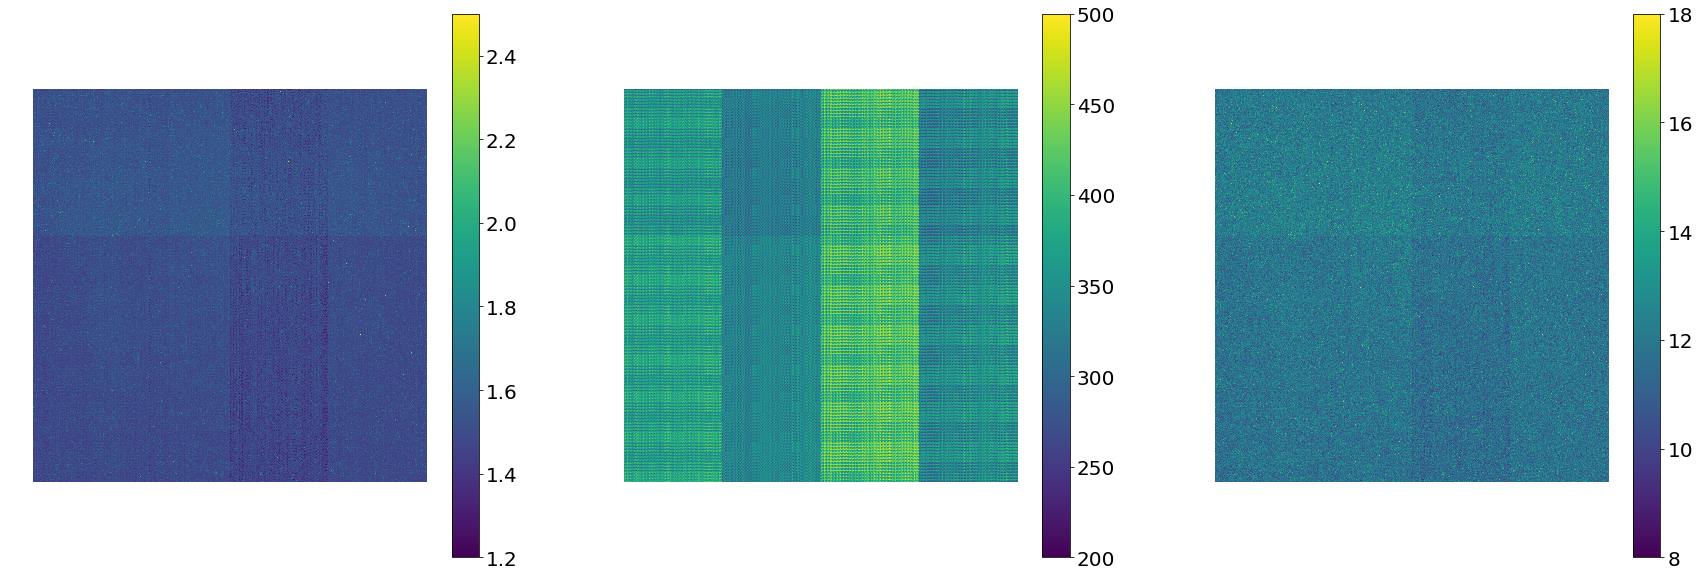

In [250]:
fig = plt.figure(figsize=(30,10))

fig.add_subplot(1,3,1)
plt.imshow(varmap,clim=[1.2,2.5])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.axis('off')

fig.add_subplot(1,3,2)
plt.imshow(meanmap,clim=[200,500])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.axis('off')

fig.add_subplot(1,3,3)
plt.imshow(peakdiffmap,clim=[8,18])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.axis('off')

#### Background from top left corner

In [237]:
corner_bg = '/srv/home/chenyu/DEbackup/081018/BGtest/1000FPS_512x512_corner/'
num_files = len(glob.glob(corner_bg + '*.npy'))
datacube_2 = np.zeros((512,512,num_files))
index = 0

for file in glob.glob(corner_bg + '*.npy'):
    mat_contents = np.load(file)
    datacube_2[:,:,index] = mat_contents
    index = index + 1
    
varmap_corner = np.zeros((512,512))
meanmap_corner = np.zeros((512,512))
peakdiffmap_corner = np.zeros((512,512))
for irow in range(512):
    for icol in range(512):
        varmap_corner[irow,icol] = np.std(datacube_2[irow,icol,:])
        meanmap_corner[irow,icol] = np.mean(datacube_2[irow,icol,:])
        peakdiffmap_corner[irow,icol] = max(datacube_2[irow,icol,:]) - min(datacube_2[irow,icol,:])
        

(-0.5, 511.5, 511.5, -0.5)

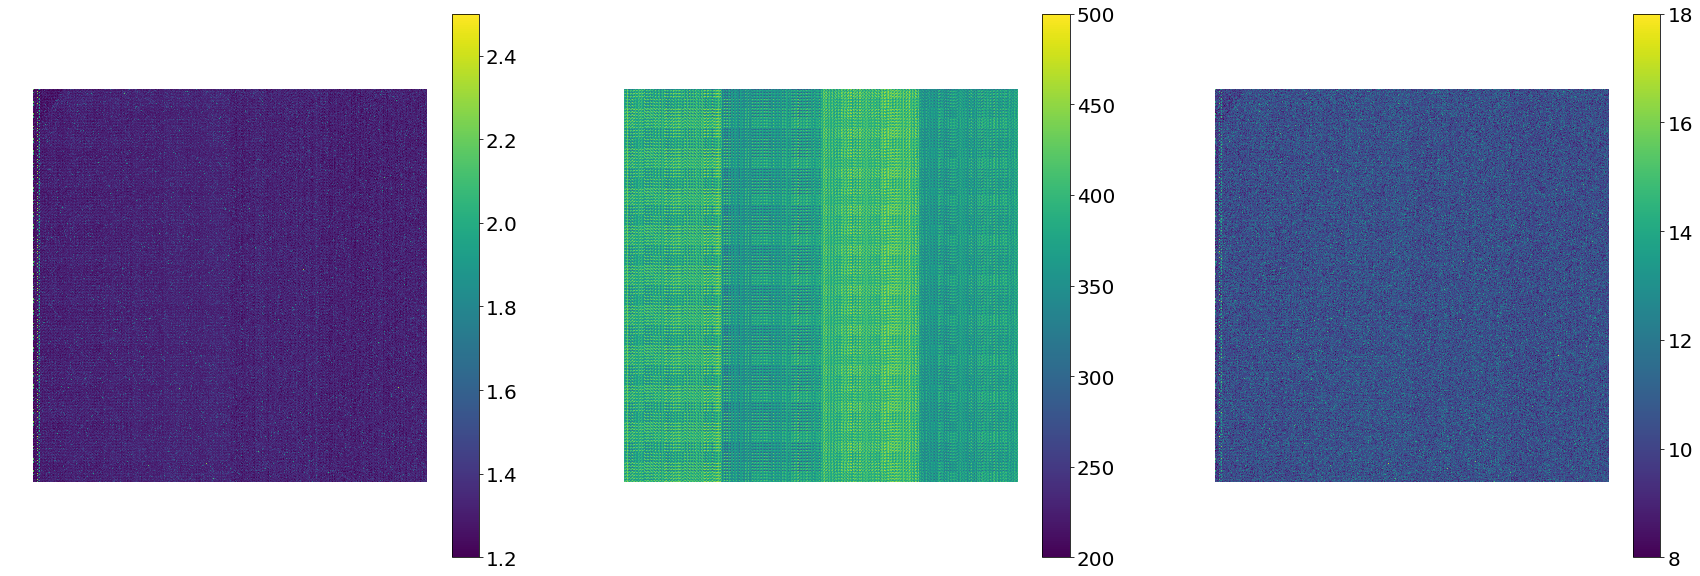

In [249]:
fig = plt.figure(figsize=(30,10))

fig.add_subplot(1,3,1)
plt.imshow(varmap_corner,clim=[1.2,2.5])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.axis('off')

fig.add_subplot(1,3,2)
plt.imshow(meanmap_corner,clim=[200,500])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.axis('off')

fig.add_subplot(1,3,3)
plt.imshow(peakdiffmap_corner,clim=[8,18])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.axis('off')

#### Check difference in dark reference

In [240]:
def loadMRCfile(filepath):
    with open(filepath, mode='rb') as file: # b is important -> binary
        file.seek(0)
        read_bytes = file.read(8)
        frame_width = struct.unpack('<i',read_bytes[0:4])
        frame_width = frame_width[0]
        frame_height = struct.unpack('<i',read_bytes[4:8])
        frame_height = frame_height[0]
        image = np.zeros((frame_height,frame_width))
        file.seek(256*4)
        dataset = file.read(frame_width*frame_height*4)
        for irow in range(frame_height):
            for icol in range(frame_width):
                pixel = struct.unpack('<f',dataset[(irow*frame_width+icol)*4:(irow*frame_width+icol+1)*4])[0]
                image[irow,icol] = pixel
        return image

(-0.5, 511.5, 511.5, -0.5)

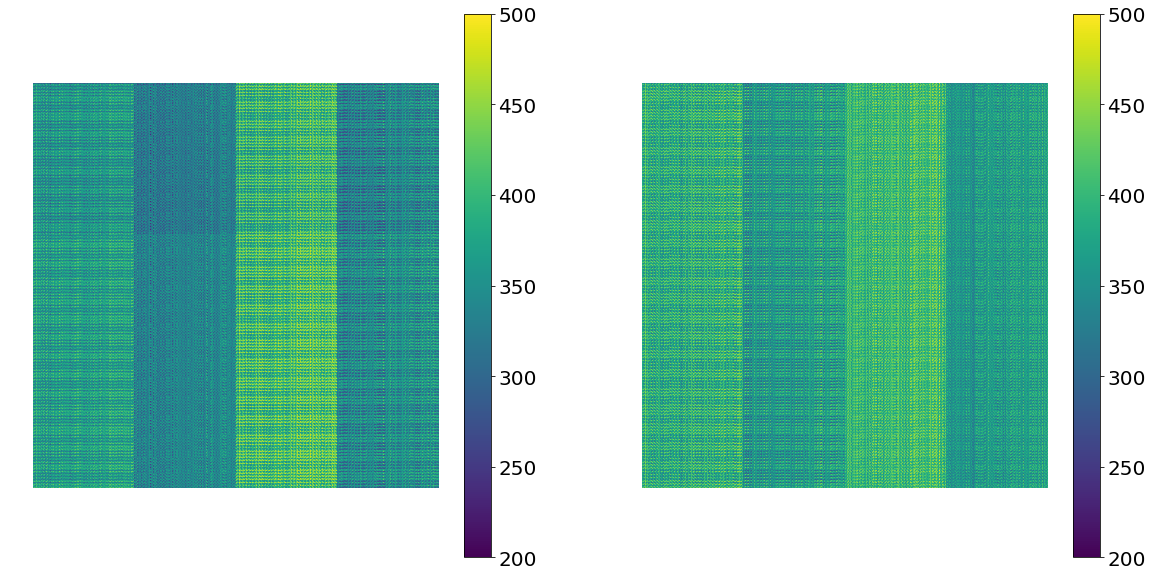

In [241]:
darkref_center = loadMRCfile('/srv/home/chenyu/DEbackup/081018/BGtest/1000FPS_512x512.seq.dark.mrc')
darkref_corner = loadMRCfile('/srv/home/chenyu/DEbackup/081018/BGtest/1000FPS_512x512_TLcorner.seq.dark.mrc')


fig = plt.figure(figsize=(20,10))

fig.add_subplot(1,2,1)
plt.imshow(darkref_center,clim=[200,500])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.axis('off')

fig.add_subplot(1,2,2)
plt.imshow(darkref_corner,clim=[200,500])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.axis('off')



In [ ]:
fig = plt.figure(figsize=(20,10))

fig.add_subplot(1,2,1)
plt.imshow(gainref_center,clim=[200,500])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.axis('off')

fig.add_subplot(1,2,2)
plt.imshow(gainref_corner,clim=[200,500])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.axis('off')

### Analysis COM map from blank scan

In [2]:
mat_contents = sio.loadmat('/srv/home/chenyu/DEbackup/080818/29MX_BlankScan/BlankScan_Recon.mat')
COM_x = mat_contents['COM_x']
COM_y = mat_contents['COM_y']

(-0.5, 149.5, 147.5, -0.5)

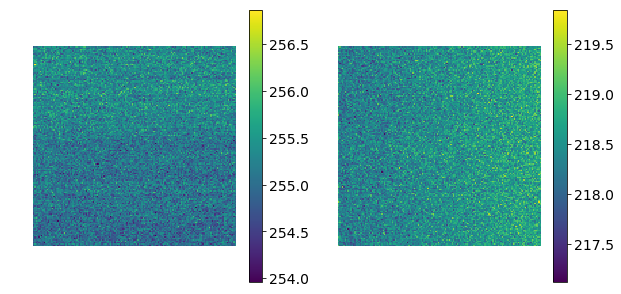

In [30]:
fig = plt.figure(figsize=(10,5))
fig.add_subplot(121)
plt.imshow(COM_x[2:150,:])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
plt.axis('off')

fig.add_subplot(122)
plt.imshow(COM_y[2:250,:])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
plt.axis('off')

### Analysis single electron event on HAADF detector from Keysight digitizer

Detector scan with normal beam current, background at -1 vs beam level at 0.9

In [35]:
path = '/srv/home/chenyu/DEbackup/080818/DetectorScan/'
file=csv.reader(open(path + 'HAADF_Preview_512_512_5_03_04_PM.csv','r'))
n=[]
for row in file:
    n.append(row)

HAADFarray = np.transpose(np.asarray(n))
HAADFarray = np.squeeze(HAADFarray)
HAADFarray = HAADFarray.astype(np.float)

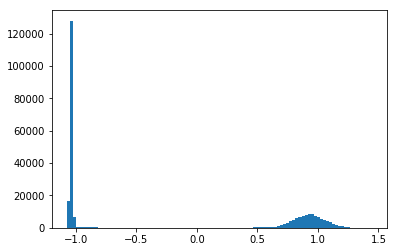

In [37]:
plt.hist(HAADFarray,bins=100)
plt.show()

Electron passing through the hole of HAADF detector using normal beam current, cannot see peak of single electron event on histogram

In [38]:
path = '/srv/home/chenyu/DEbackup/081018/SingleElectronEvent/'
file=csv.reader(open(path + 'HAADF_Preview_500_500_2_49_27_PM.csv','r'))
n=[]
for row in file:
    n.append(row)

HAADFarray = np.transpose(np.asarray(n))
HAADFarray = np.squeeze(HAADFarray)
HAADFarray = HAADFarray.astype(np.float)

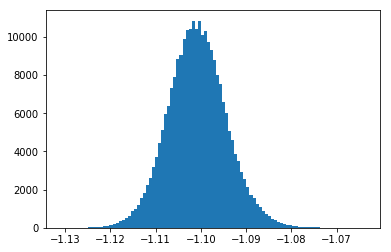

In [39]:
plt.hist(HAADFarray, bins=100)
plt.show()

In [7]:
path = '/srv/home/chenyu/DEbackup/090718/SingleElectrons/10MSa/'
file=csv.reader(open(path + 'HAADF_Preview_512_512_5_04_57_PM.csv','r'))
n=[]
for row in file:
    n.append(row)

HAADFarray = np.transpose(np.asarray(n))

In [11]:
HAADFarray = np.squeeze(HAADFarray)
HAADFarray = HAADFarray.astype(np.float)
HAADFimg = np.reshape(HAADFarray,(512,512))

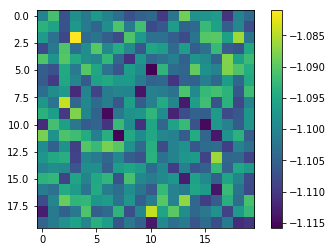

In [24]:
plt.imshow(HAADFimg[120:140,140:160])
plt.colorbar()

In [251]:
plt.plot(HAADFimg[122,140:150])

NameError: name 'HAADFimg' is not defined

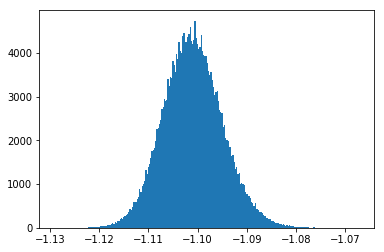

In [20]:
plt.hist(HAADFarray, bins='auto')
plt.show()

Overall signal

([], <a list of 0 Text yticklabel objects>)

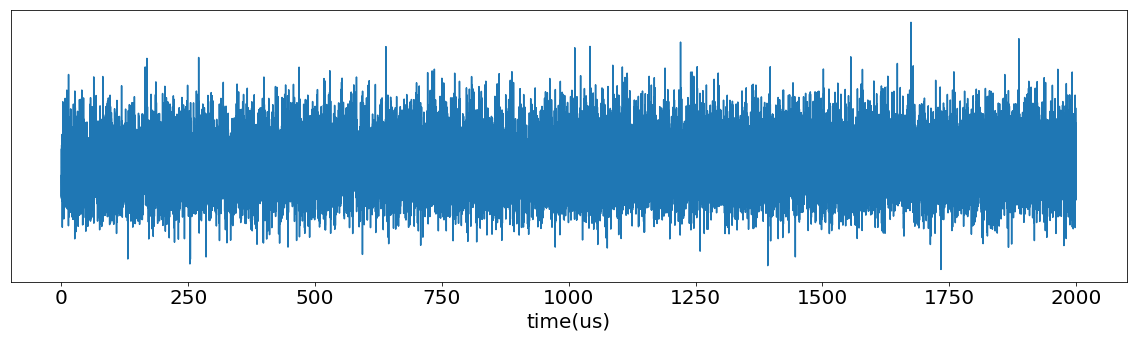

In [10]:
size = 40000
fig = plt.figure(figsize=(20,5))
x1 = np.linspace(0,0.05*(size-1),num=size)
plt.plot(x1,HAADFarray[20000:60000])
plt.xlabel('time(us)',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks([])

Case1

In [252]:
size = 20
start = 670
fig = plt.figure(figsize=(10,5))
x1 = np.linspace(0,0.05*(size-1),num=size)
plt.plot(x1,-1.15 - HAADFarray[start:start + size])
plt.show
plt.xlabel('time(us)',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks([])

NameError: name 'HAADFarray' is not defined

<Figure size 720x360 with 0 Axes>

Case2

([], <a list of 0 Text yticklabel objects>)

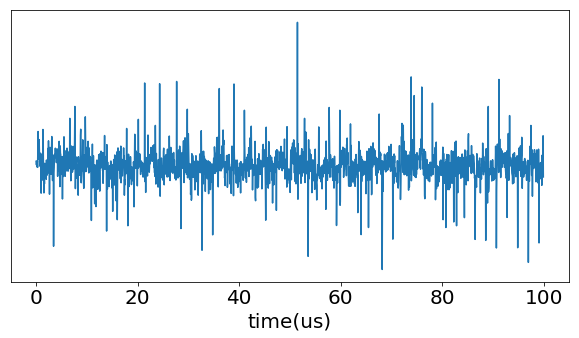

In [167]:
size = 2000
start = 2070
fig = plt.figure(figsize=(10,5))
x1 = np.linspace(0,0.05*(size-1),num=size)
plt.plot(x1,-1.15 - HAADFarray[start:start + size])
plt.show
plt.xlabel('time(us)',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks([])

### Script to analysis blank data collected using 256x256 px sensor

In [12]:
path = '/srv/home/chenyu/DEbackup/091118/2000FPS/'
num_files = len(glob.glob(path + '*.npy'))
datacube = np.zeros((256,256,num_files))
index = 0

for file in glob.glob(path + '*.npy'):
    frame = np.load(file)
    datacube[:,:,index] = frame
    index = index + 1


### Script to analysis beam intensity in beam grid scan, which has beam triplet artifact

In [37]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import copy

In [42]:
def get_std(image):
    return np.std(image)

def get_max(image,sigma,alpha=20,size=10):
    i_out = []
    j_out = []
    image_temp = copy.deepcopy(image)
    while True:
        k = np.argmax(image_temp)
        j,i = np.unravel_index(k, image_temp.shape)
        if(image_temp[j,i] >= alpha*sigma):
            i_out.append(i)
            j_out.append(j)
            x = np.arange(i-size, i+size)
            y = np.arange(j-size, j+size)
            xv,yv = np.meshgrid(x,y)
            image_temp[yv.clip(0,image_temp.shape[0]-1),
                                   xv.clip(0,image_temp.shape[1]-1) ] = 0
            #print (xv)
        else:
            break
    return i_out,j_out



In [190]:
path = '/srv/home/chenyu/DEbackup/091618/T6/'
savebaseName = 'T6'

In [191]:
peak_ratio = np.zeros((20,20))
scan_grid = np.zeros((512,512))
kx = np.linspace(0,511,512)
ky = np.linspace(0,511,512)
kx2,ky2 = np.meshgrid(kx,ky)

for irow in range(20):
    for icol in range(20):
        iframe = irow*20+icol
        filename = path + savebaseName + '_' + format(iframe+1,'05') + '.npy'
        image = np.load(filename)
        image_filt = scipy.ndimage.filters.gaussian_filter(image, 2)
        #computing the standard deviation of the image
        sigma = get_std(image_filt)
        #getting the peaks
        i,j = get_max(image_filt,sigma, alpha=10, size=10)
        peaks_x = np.asarray(i)
        peaks_y = np.asarray(j)
        
        if peaks_x.shape[0] >= 2:
            
            inds = peaks_x.argsort()
            peaks_y = peaks_y[inds]
            peaks_x = peaks_x[inds]

            center_x = peaks_x[0]
            center_y = peaks_y[0]
            distance_from_center = np.sqrt((kx2 - center_x)**2 + (ky2-center_y)**2)
            mask = distance_from_center <= 5
            peak1 = (image*mask).sum()

            center_x = peaks_x[1]
            center_y = peaks_y[1]
            distance_from_center = np.sqrt((kx2 - center_x)**2 + (ky2-center_y)**2)
            mask = distance_from_center <= 5
            peak2 = (image*mask).sum()

            peak_ratio[irow,icol] = peak1/peak2
            
        else:
            
            peak_ratio[irow,icol] = 0

        scan_grid = scan_grid + image


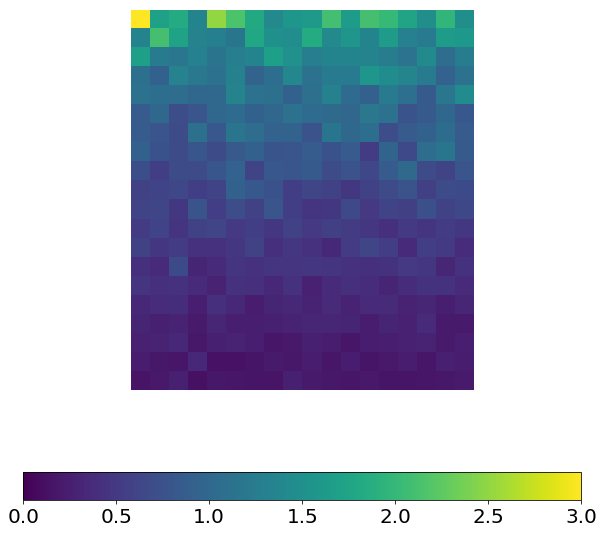

In [192]:
fig = plt.figure(figsize=(10,10))
plt.imshow(peak_ratio[:,1:-1])
cbar = plt.colorbar(orientation='horizontal')
cbar.ax.tick_params(labelsize=20)
plt.axis('off')
plt.clim([0,3])

0.45473874145940535


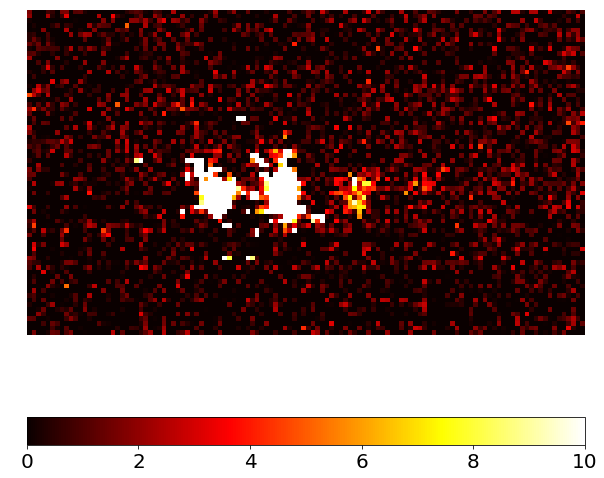

In [171]:
sample = np.load(path+'T2_00218.npy')
image = scipy.ndimage.filters.gaussian_filter(sample, 2)
#computing the standard deviation of the image
sigma = get_std(image)
#getting the peaks
i,j = get_max(image,sigma, alpha=10, size=10)

peaks_x = np.asarray(i)
peaks_y = np.asarray(j)

inds = peaks_x.argsort()
peaks_y = peaks_y[inds]
peaks_x = peaks_x[inds]

center_x = peaks_x[0]
center_y = peaks_y[0]
distance_from_center = np.sqrt((kx2 - center_x)**2 + (ky2-center_y)**2)
mask = distance_from_center <= 5
peak1 = (sample*mask).sum()

center_x = peaks_x[1]
center_y = peaks_y[1]
distance_from_center = np.sqrt((kx2 - center_x)**2 + (ky2-center_y)**2)
mask = distance_from_center <= 5
peak2 = (sample*mask).sum()

print(peak1/peak2)

#let's see the results
fig = plt.figure(figsize=(10,10))
plt.imshow(sample[200:270,30:150], origin='lower',cmap='hot',clim=[0,10])
cbar = plt.colorbar(orientation='horizontal')
cbar.ax.tick_params(labelsize=20)
plt.axis('off')
#plt.scatter(peaks_x,peaks_y)

plt.show()

In [81]:
peaks_x.shape[0]

2

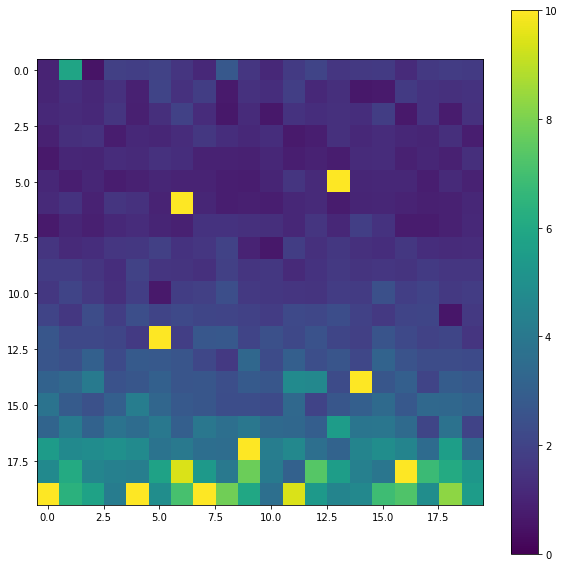

In [86]:
fig = plt.figure(figsize=(10,10))
plt.imshow(peak_ratio)
plt.colorbar()
plt.clim([0,10])